Episode 100/10000, Avg Reward: -41754.89
Episode 200/10000, Avg Reward: -45515.32
Episode 300/10000, Avg Reward: -46385.87
Episode 400/10000, Avg Reward: -41241.37
Episode 500/10000, Avg Reward: -43434.83
Episode 600/10000, Avg Reward: -37245.03
Episode 700/10000, Avg Reward: -37034.78
Episode 800/10000, Avg Reward: -33343.96
Episode 900/10000, Avg Reward: -12771.68
Episode 1000/10000, Avg Reward: -19457.13
Episode 1100/10000, Avg Reward: -11664.94
Episode 1200/10000, Avg Reward: -9063.61
Episode 1300/10000, Avg Reward: -14340.15
Episode 1400/10000, Avg Reward: -21920.27
Episode 1500/10000, Avg Reward: -18334.39
Episode 1600/10000, Avg Reward: -19245.22
Episode 1700/10000, Avg Reward: -18326.37
Episode 1800/10000, Avg Reward: -15036.53
Episode 1900/10000, Avg Reward: -8347.40
Episode 2000/10000, Avg Reward: -5844.76
Episode 2100/10000, Avg Reward: -4555.59
Episode 2200/10000, Avg Reward: -8544.80
Episode 2300/10000, Avg Reward: -17810.34
Episode 2400/10000, Avg Reward: -19037.92
Episod

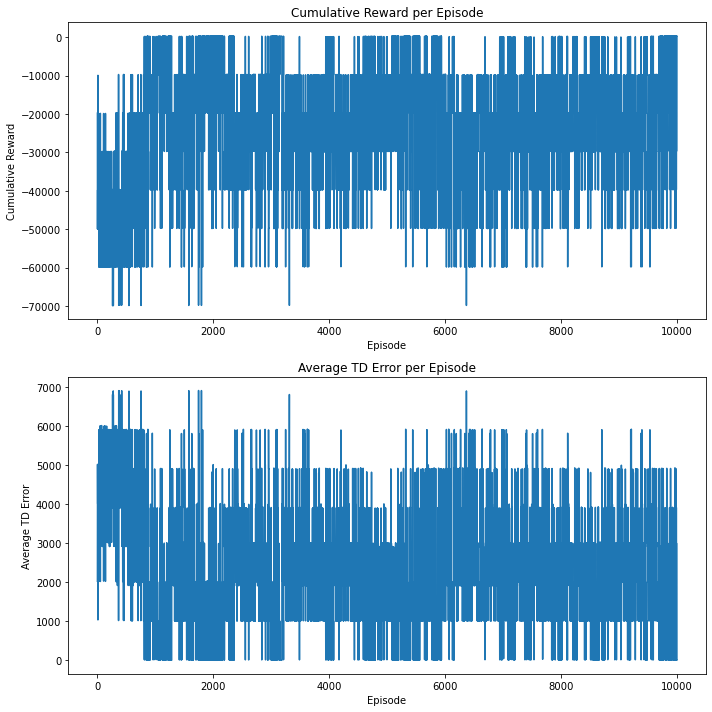

Average reward over 10000 episodes: -21706.27


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
from modified_tsp import ModTSP  # Assuming ModTSP is defined elsewhere

class SARSAAgent:
    def __init__(self, n_actions: int, alpha: float = 0.1, gamma: float = 0.99, epsilon: float = 0.8, epsilon_decay: float = 0.995, epsilon_min: float = 0.01):
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.q_table: Dict[str, np.ndarray] = {}

    def get_action(self, state: np.ndarray) -> int:
        state_key = self._get_state_key(state)
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(self.n_actions)
        
        # Epsilon-greedy action selection
        if np.random.random() < self.epsilon:
            return np.random.choice(self.n_actions)  # Random exploration
        return np.argmax(self.q_table[state_key])  # Greedy action selection

    def update(self, state: np.ndarray, action: int, reward: float, next_state: np.ndarray, next_action: int) -> float:
        state_key = self._get_state_key(state)
        next_state_key = self._get_state_key(next_state)
        
        if next_state_key not in self.q_table:
            self.q_table[next_state_key] = np.zeros(self.n_actions)
        
        # SARSA update rule
        current_q = self.q_table[state_key][action]
        next_q = self.q_table[next_state_key][next_action]
        
        td_target = reward + self.gamma * next_q
        td_error = td_target - current_q
        
        # Update Q-value
        self.q_table[state_key][action] += self.alpha * td_error
        
        return td_error

    def _get_state_key(self, state: np.ndarray) -> str:
        # State key is rounded for consistency in Q-table
        return str(state.round(decimals=2))

    def decay_epsilon(self):
        # Gradual decay of epsilon, but it won't go below the minimum
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

def run_experiment(num_episodes: int = 10000, num_targets: int = 10, shuffle_time: int = 10):
    env = ModTSP(num_targets=num_targets, shuffle_time=shuffle_time)
    agent = SARSAAgent(n_actions=num_targets)

    episode_rewards = []
    td_errors = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        action = agent.get_action(state)
        total_reward = 0
        episode_td_errors = []

        while True:
            next_state, reward, done, truncated, _ = env.step(action)
            next_action = agent.get_action(next_state)
            
            td_error = agent.update(state, action, reward, next_state, next_action)
            episode_td_errors.append(abs(td_error))
            
            total_reward += reward
            state = next_state
            action = next_action

            if done or truncated:
                break

        episode_rewards.append(total_reward)
        td_errors.append(np.mean(episode_td_errors))
        
        # Decay epsilon after each episode
        agent.decay_epsilon()

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{num_episodes}, Avg Reward: {np.mean(episode_rewards[-100:]):.2f}")

    return episode_rewards, td_errors

def plot_results(episode_rewards: List[float], td_errors: List[float]) -> None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    ax1.plot(episode_rewards)
    ax1.set_title('Cumulative Reward per Episode')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Cumulative Reward')
    
    ax2.plot(td_errors)
    ax2.set_title('Average TD Error per Episode')
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Average TD Error')
    
    plt.tight_layout()
    plt.show()

def main():
    num_episodes = 10000
    num_targets = 10
    shuffle_time = 10

    episode_rewards, td_errors = run_experiment(num_episodes, num_targets, shuffle_time)
    plot_results(episode_rewards, td_errors)

    print(f"Average reward over {num_episodes} episodes: {np.mean(episode_rewards):.2f}")

if __name__ == "__main__":
    main()
